In [1]:
using PyPlot
include("lib/all.jl");

In [2]:
particles = make_particles(2^20);
t = DTree(particles, 12);
#t = Tree(view(particles,1:length(particles)), 12);

----------


In [3]:
@time group!(t);

  0.

In [4]:
@time inform!(t);

  0.145198 seconds (391.12 k allocations: 9.694 MB)


In [5]:
ax = zeros(length(particles))
ay = zeros(length(particles))
az = zeros(length(particles));

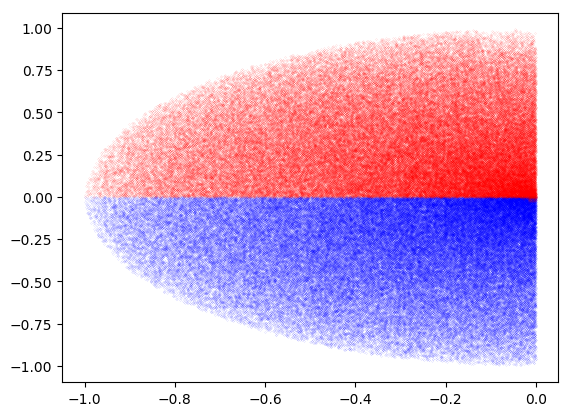

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcbe48516d8>

In [6]:
x1 = [p.y for p in t.trees[1].particles]
y1 = [p.z for p in t.trees[1].particles]
x2 = [p.y for p in t.trees[3].particles]
y2 = [p.z for p in t.trees[3].particles]
plot(x1,y1,"b.",ms=0.1)
plot(x2,y2,"r.",ms=0.1)

In [ ]:
ts=Float64[]
for i in 1:12
    tic()
    interact!(t, 0.3, ax, ay, az, 1.0e-3);
    append!(ts, toq())
    @show i
end

In [10]:
mean(ts)

0.22686817783333332

In [ ]:
@time collect!(t, ax,ay,az)

In [ ]:
mx,myd,e50,e90,e95,e99,m,s = perf(t.particles, ax,ay,az, 10000, 1.0e-3)
print(myd)

In [ ]:
myd = [0.0,0.0,0.0,1.0,2.0,5.0,9.0,20.0,57.0,109.0,252.0,556.0,975.0,1541.0,1922.0,1828.0,1294.0,758.0,401.0,138.0,76.0,35.0,15.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]
my =  [0.0,0.0,0.0,0.0,1.0,0.0,6.0,3.0,10.0,21.0,39.0,90.0,220.0,421.0,777.0,1342.0,2269.0,3472.0,1262.0,58.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
semilogx(10.^mx,myd,"-k")
semilogx(10.^mx,my ,"-r")
#semilogx(10.^mx,myq ,"-g")

In [ ]:
e50

In [ ]:
e90

In [ ]:
e99

In [ ]:
plot([p.x for p in t.particles], [p.y for p in t.particles], ".", ms=0.05)